### 2.3.2 k-最近傍法

|k-最近傍法|
|:-|

k-最近傍法アルゴリズムは，最も単純な学習アルゴリズムであると言われる．モデルの構築は，訓練データセットを格納するだけだ．新しいデータポイントに対する予測を行う際には，訓練データセットの中から一番近い点つまり「最近傍点」を見つける．

```
# データセットの生成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
# plt.show()
print("X.shape: {}".format(X.shape))
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

#### 2.3.2.1 k-最近傍法によるクラス分類

In [7]:
print(mglearn.plots)

<module 'mglearn.plots' from 'c:\\Users\\seiji\\anaconda3\\envs\\machine_learning_oreilly\\Lib\\site-packages\\mglearn\\plots.py'>


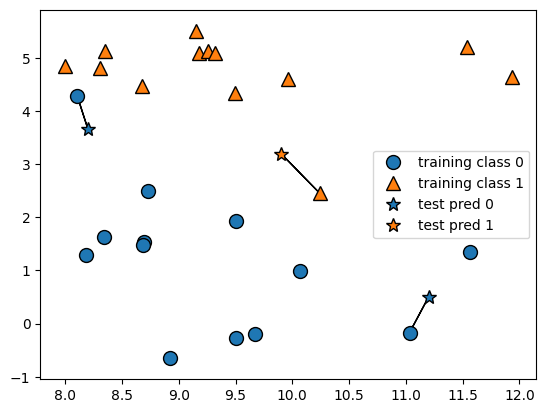

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

近傍点は１つとは限らず，任意個の，つまりk個の近傍点を考慮することもできる．これが，k-最近傍法の名前の由来だ．１つ以上の近傍点を考慮に入れる場合には，**投票**でラベルを決める．つまり，個々のテストする点に対して，近傍点のうち，いくつがクラス0に属し，いくつが1に属するのかを数えるのだ，そして，最も多くあらわれたクラスをその点に与える，言い換えればk-最近傍点の多数派のクラスを採用するのだ．

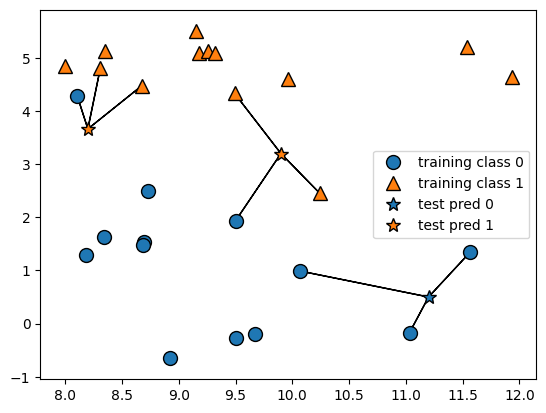

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

ここで示しているのは２クラス分類問題だが，この方法は任意のクラス数に対しても適用できる．クラスがたくさんあるときには，それぞれのクラスに対して近傍点がいくつあるかを数えて，最も多いクラスを予測値とすればよい．

|scikit-learnを用いてk-最近傍法アルゴリズムが適用できるかを見る|
|:-|

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# random_stateに整数値を設定すると，その値をシード値として使用し，同じデータセットに対して何度実行しても同じようにデータが分割される．
# random_stateを設定しない場合，またはNoneに設定した場合，毎回異なる分割が行われる．
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X")
print(X)
print("y")
print(y)


X
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
y
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [12]:
# 分割された訓練データを表示
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
y_train
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


In [13]:
# 分割されたテストデータを表示
print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_test
[[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
y_test
[1 0 1 0 1 1 0]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Test set predictions: {}".format(clf.predict(X_test))) 
#テストデータに対して予測を行うにはpredictメソッドを呼び出す．テストセットのそれぞれのデータポイントに対して，
#訓練セットの中から最近傍点を計算し，最も多いクラスを見つけ出す．

Test set predictions: [1 0 1 0 1 0 0]


y_test（解答）は [1 0 1 0 1 1 0] だが，predictions（回答）は [1 0 1 0 1 0 0] なので正解率は6/7で0.86．

In [17]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test))) #テストセットに対する精度

Test set accuracy: 0.86


#### 2.3.2.2 KNeighborsClassifierの解析

２次元のデータセットについては、xy平面のすべての点について、予測結果を表示することができる。平面を、そこに点があったとしたら分類されていたであろうクラスに従って色付けする。こうすると、アルゴリズムがクラス0に割り当てられる場合と、クラス1に割り当てる場合の**決定境界**（decision boundary）が見える。次のコードは$k$が１，３，９の場合の決定きゅおう会を描画する。（**図2-26**）。


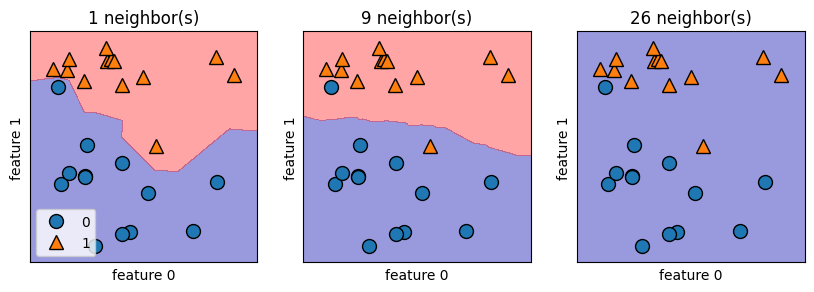

In [18]:
#kが1,3,9の場合の決定境界を描画する
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 9, 26], axes):
    #fitメソッドは自分自身を返すので，１行で
    #インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) # X, y = mglearn.datasets.make_forge()
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

**図2-26 異なる最近傍点数に対する決定境界**

左の図からわかるように，一つの最近傍点のみを用いると，決定境界は，訓練データに近くなる．より多くの最近傍点を考慮すると，決定境界はよりなめらかになる．なめらかな境界は，単純なモデルに対応する．つまり，最近傍点が少ない場合は複雑度の高いモデル（訓練精度が高く，テスト精度が低い．また，それぞれの精度が乖離している）最近傍点が多い場合は複雑度の低いモデル（訓練精度とテスト精度の差が小さい）に対応している。また、近傍点数を訓練データセットのすべてのデータポイントの数にしたものが右の図である。すべてのテストデータは全く同じ近傍点を持つので、すべてのテストデータに対する予測結果は全く同じになる。予測結果は訓練セット中で最も多いクラスになる。（今回はクラス0とクラス1の数が同じなので、順番の早いクラス0が結果として出力されているか？）

**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い1点のクラスがその点のクラスとして予想される．  
**9 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い9点のクラスがその点のクラスとして予想される．左図と比べて境界が滑らかになっている．  
**1 neighbor(s)の意味**  
図中の任意の場所に点を打ったとき，その点から最も近い26点（すべての点）のクラスがその点のクラスとして予想される．どこに点を打ってもすべての点が最近傍点と認識される．なので訓練セット中で最も多いクラスが予測結果になるが，今回は同数なので順番の速いクラス（クラス0）が予測結果として出力されていると考えられる．

|実世界のcancerデータセットを用いてモデルの複雑さと汎化性能の関係を確認する|
|:-|

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

今回使うload_brast_cancerを可視化する．「scikit-learnを用いて」と同じデータセット。

In [ ]:
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

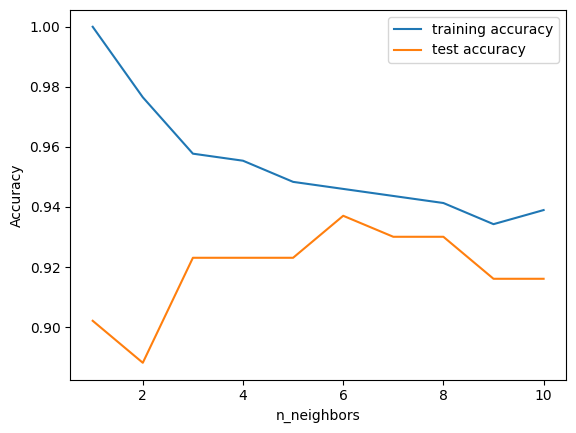

In [ ]:
# stratify=cancer.targetとすることで，訓練セットとテストセットに含まれるクラス比率が元のデータセットと同じになるようにする
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 分割前のデータを作る
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 2.3.2.3 k-近傍回帰

|k-近傍回帰|
|:-|

k-近傍回帰には，回帰を行う変種がある．ここでも１最近傍点を用いるものから見ていく．今回はwaveデータセットを用いる．３つのテストデータポイントを緑色の星印としてx軸上に書いた．１最近傍点を用いる予測では，最近傍点の値をそのまま使う．下図の青い星印が予測点である．

**k-最近傍法**  
- 分類問題に使用される
- 与えられた入力データポイントのクラスラベル（カテゴリ）を予測する．
- 例：画像を見て犬か猫かを分類する．  

**k-近傍回帰**  
- 回帰問題に使用される．
- 与えられてた入力データポイントの連続値（数値）を予測する．
- 例：家の特徴（面積，部屋数など）を基に家の価格を予測する．  

**出力の違い**  
- **k-最近傍法**
  - 出力は離散的なクラスラベル．例えば「クラス１」「クラス２」など．
  - k個の最近傍のデータポイントの多数決（投票）に基づいて，対象のデータポイントのクラスラベルを決定する．
- **k-近傍回帰**
  - 出力は連続的な数値．例えば，0から100までの範囲の数値や実際の価格など．
  - k個の最近傍のデータポイントの目標値の平均または重み付き平均に基づいて，対象のデータポイントの数値を予測する．

ここでいう「回帰」とは，**連続値の出力を予測する問題**を指す．与えられた入力データ（特徴）に基づいて数値的な出力を予測することを目的としている．

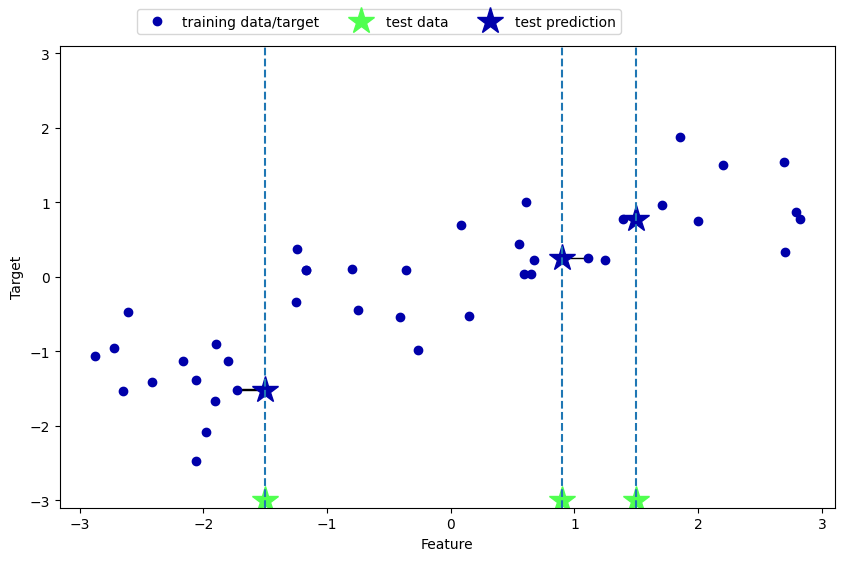

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

mglearn.plots.plot_knn_regression(n_neighbors=1)

**１最近傍点を用いる予測**  
最近傍点の値をそのまま使う

---

クラス分類の場合と同様に，より多くの最近傍点を用いることもできる．複数の最近傍点を用いる場合には，最近傍点の平均値を用いる．

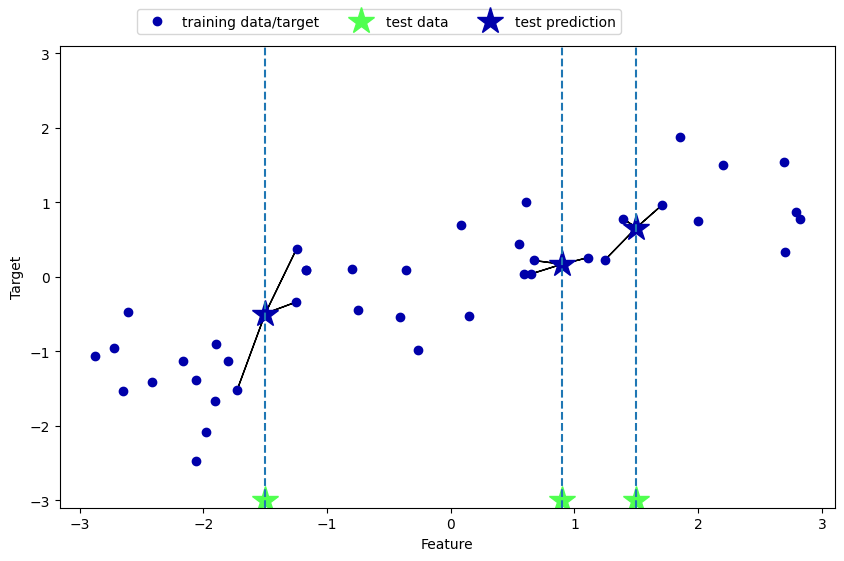

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

**３近傍回帰を用いたwaveデータセットでの予測**  
３近傍点の平均点を用いている。

回帰のためのk-最近傍アルゴリズムは、scilit-learnのKNeighborRegressorクラスに実装されている。KNeighborsClassifierと同様に利用できる。

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる．
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print("X_test:\n{}".format(X_test)) # テストセット
print("y_test:\n{}".format(y_test)) # テストセット

X_test:
[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
y_test:
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]


In [ ]:
print("y_test:\n{}".format(y_test)) # テストセットのターゲット（解答）
print("Test set predictions:\n{}".format(reg.predict(X_test))) # 予測値

y_test:
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
Test set predictions:
[-0.76885025  0.16870118  0.81020743 -1.49113268 -1.49113268 -1.35931037
  0.16870118  0.90283566 -0.13712298 -1.49113268]


y_testとTest set predictionsを比較するとその精度がわかる。上は3-最近傍回帰を用いたwaveデータセットでの予測である。

---

scoreメソッドを用いてモデルを評価することもできる．このメソッドに対して回帰予測器は，$R^2$スコアを返す．$R^2$スコアは決定係数と呼ばれ，回帰モデルの予測の正確さを測る指標で，0から1までの値を取る．1は完全な予測に対応し，0は訓練セットのレスポンス値の平均を返すだけのものに対応する．

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


これでスコアは0.83となっている。これは比較的良いモデルであることを意味する．

#### 2.3.2.4 KneighborsRegressorの解析

**一次元のデータセットに対して，すべての値に対する予測値がどのようになるかを見てみる．これには，たくさんのデータポイントを持つデータセットをつくればよい．**

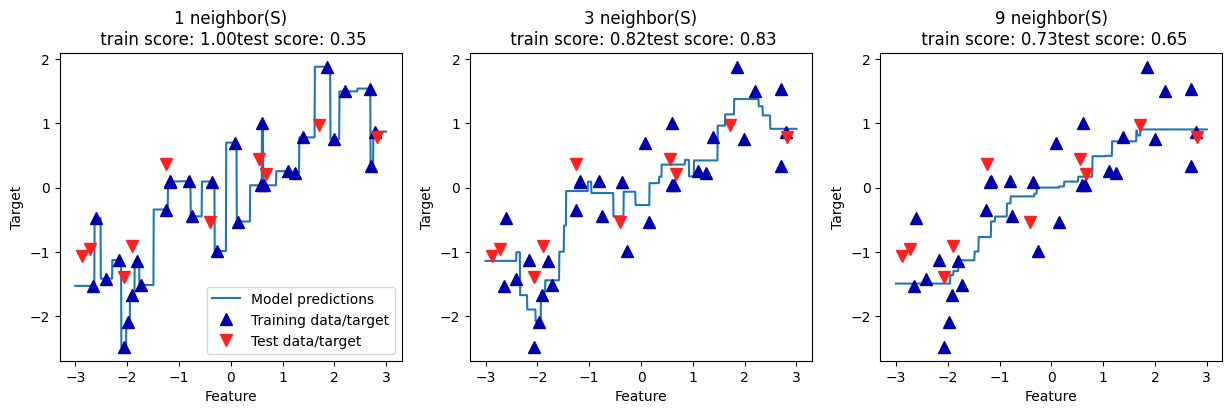

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る．
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(S)\n train score: {:.2f}test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc ="best")
        

**さまざまなn_neighborsの値に対する最近傍回帰による予測の比較**  
Test data/targetとModel predictionsの距離が近いほうがテストデータに対する精度が高いと言える。Training data/targetとModel predictionsの距離が近いほうがテストデータに対する精度が高いと言える。

このグラフからわかるように，１最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えており，予測はすべて訓練データのポイントを通っている．このため予測は非常に不安定になっている．考慮する最近傍点を増やしていくと，予測はスムーズになるが，訓練データに対する適合度は下がる．  

#### 2.3.2.5 利点と欠点パラメータ

k-最近傍法はアルゴリズムは理解しやすいという特徴はあるが、処理速度が遅く多数の特徴量を扱うことができないため、実際にはほとんど使われていない。次に述べる手法はこれらの問題点はない。